In [1]:
import numpy as np
from matplotlib import pyplot as plt

from GOULD_4094 import capture

In [5]:
from sigproc_kit import *

In [2]:
device = "/dev/ttyUSB0"

In [3]:
x,y1 = capture("1A",device=device)

communicating with scope
may take up to 15 seconds
sending command HSA
DSO received command HSA

received answer:
HSA=20E-9
sending command VS1
DSO received command VS1

received answer:
VS1=50E-3~
sending command PBG1
DSO received command PBG1

received answer:
PBG1=X1
sending command VP1
DSO received command VP1

received answer:
VP1=-2.32

whole screen width: 2e-07 sec
probe gain: 1
whole screen height: 0.4 volts
trace offset: -0.116 volts
sending command TRC1A
DSO received command TRC1A

received answer:
TRC1A=-87,-87,-86,-87,-86,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-88,-87,-86,-87,-86,-87,-87,-86,-87,-87,-86,-87,-87,-87,-87,-87,-87,-86,-87,-87,-87,-87,-86,-87,-87,-87,-87,-86,-86,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-86,-87,-87,-88,-87,-86,-87,-87,-87,-87,-87,-87,-87,-87,-87,-87,-86,-86,-86,-84,-83,-81,-77,-73,-66,-59,-52,-43,-36,-28,-21,-13,-8,0,6,12,19,24,30,35,38,44,48,52,56,59,64,68,71,73,76,79,81,82,84,85,86,87,87,88,89,89,

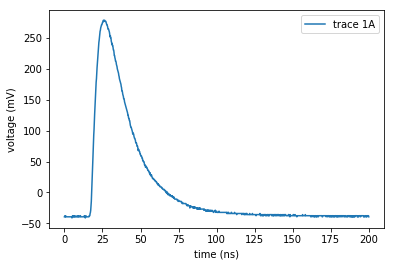

In [4]:
plt.plot(x*1e9,y1*1e3,label="trace 1A")
plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.legend()

tau1: 16.817 ns
tau2: 4.679 ns
Q   : 172.340 pC


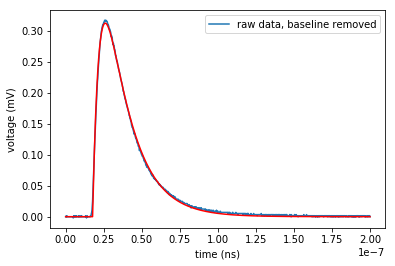

In [7]:


xdata =  x
ydata =  y1 

ydata = remove_baseline(ydata,fraction=0.04)

plt.plot(xdata,ydata,label="raw data, baseline removed")

#detector_signal_function(t, Q, tau1, tau2, delay)
popt, pcov = curve_fit( detector_signal_function
                     , xdata, ydata, p0 = [500e-12,5e-9,30e-9,5e-9])

print("tau1: {:3.3f} ns".format( popt[1]*1e9 ))
print("tau2: {:3.3f} ns".format( popt[2]*1e9 ))
print("Q   : {:3.3f} pC".format( popt[0]*1e12))

plt.plot(xdata,detector_signal_function(xdata,*popt),"r")

plt.xlabel("time (ns)")
plt.ylabel("voltage (mV)")
plt.legend()
plt.show()